In [2]:
import pandas as pd
data = pd.read_csv('D:/user/User/pydata/Ex_CEOSalary.csv',encoding='utf-8')

In [5]:
data.describe(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   sales     209 non-null    float64
 2   roe       209 non-null    float64
 3   industry  209 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.7 KB


(             salary         sales         roe    industry
 count    209.000000    209.000000  209.000000  209.000000
 mean    1281.119617   6923.793282   17.184211    2.239234
 std     1372.345308  10633.271088    8.518509    1.083172
 min      223.000000    175.199997    0.500000    1.000000
 25%      736.000000   2210.300049   12.400000    1.000000
 50%     1039.000000   3705.199951   15.500000    2.000000
 75%     1407.000000   7177.000000   20.000000    3.000000
 max    14822.000000  97649.898438   56.299999    4.000000,
 None)

In [8]:
data['industry'].value_counts()

1    72
3    60
2    46
4    31
Name: industry, dtype: int64

In [9]:
data['industry'] = data['industry'].replace([1,2,3,4], ['Service','IT','Finance','Others'])
data['industry'].value_counts()

Service    72
Finance    60
IT         46
Others     31
Name: industry, dtype: int64

<AxesSubplot:ylabel='industry'>

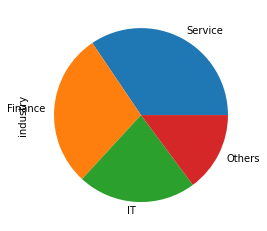

In [10]:
%matplotlib inline
data['industry'].value_counts().plot(kind='pie')

In [11]:
data.skew()

salary    6.904577
sales     5.035336
roe       1.572126
dtype: float64

In [12]:
data.kurtosis()

salary    58.971229
sales     33.115193
roe        3.797366
dtype: float64

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

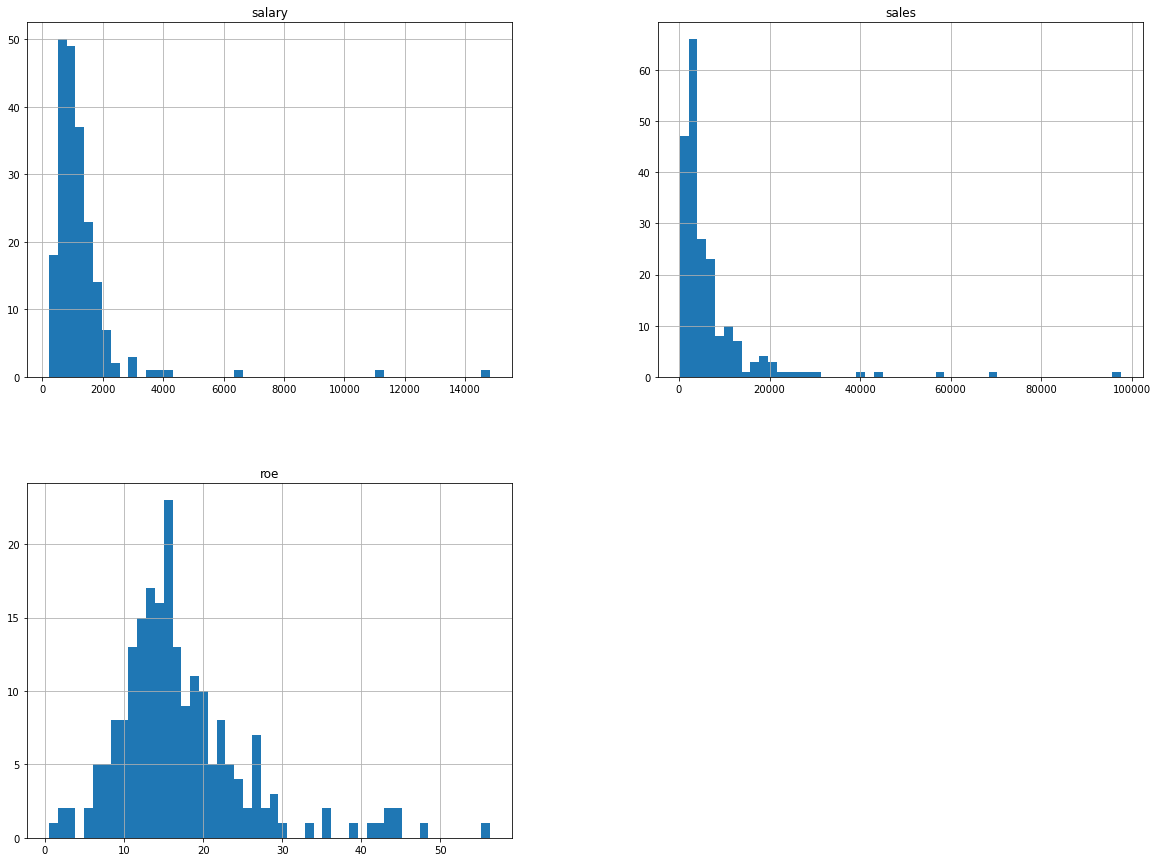

In [13]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))

In [14]:
data.corr()

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


In [15]:
data.corr(method="pearson")

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


Boxplot(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x000002271CFC4D60>, <matplotlib.lines.Line2D object at 0x000002271CFD70A0>], 'caps': [<matplotlib.lines.Line2D object at 0x000002271CFD7400>, <matplotlib.lines.Line2D object at 0x000002271CFD7760>], 'boxes': [<matplotlib.lines.Line2D object at 0x000002271CFC49D0>], 'medians': [<matplotlib.lines.Line2D object at 0x000002271CFD7AC0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000002271CFD7E20>], 'means': []})

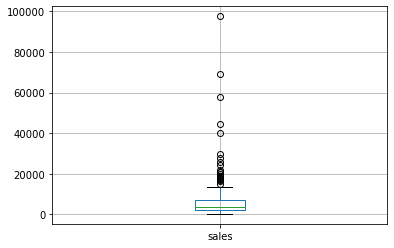

In [16]:
data.boxplot(column='sales', return_type='both')

In [20]:
# 3-1. salary 변수 이상치 처리
Q1_salary = data['salary'].quantile(q=0.25)
Q3_salary = data['salary'].quantile(q=0.75)
IQR_salary = Q3_salary - Q1_salary
IQR_salary

671.0

In [21]:
data_IQR=data[(data['salary']<Q3_salary+IQR_salary*1.5)& (data['salary']>Q1_salary-IQR_salary*1.5)] 


<AxesSubplot:>

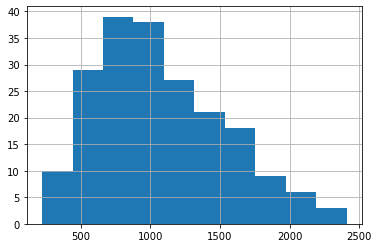

In [22]:
data_IQR['salary'].hist()


array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

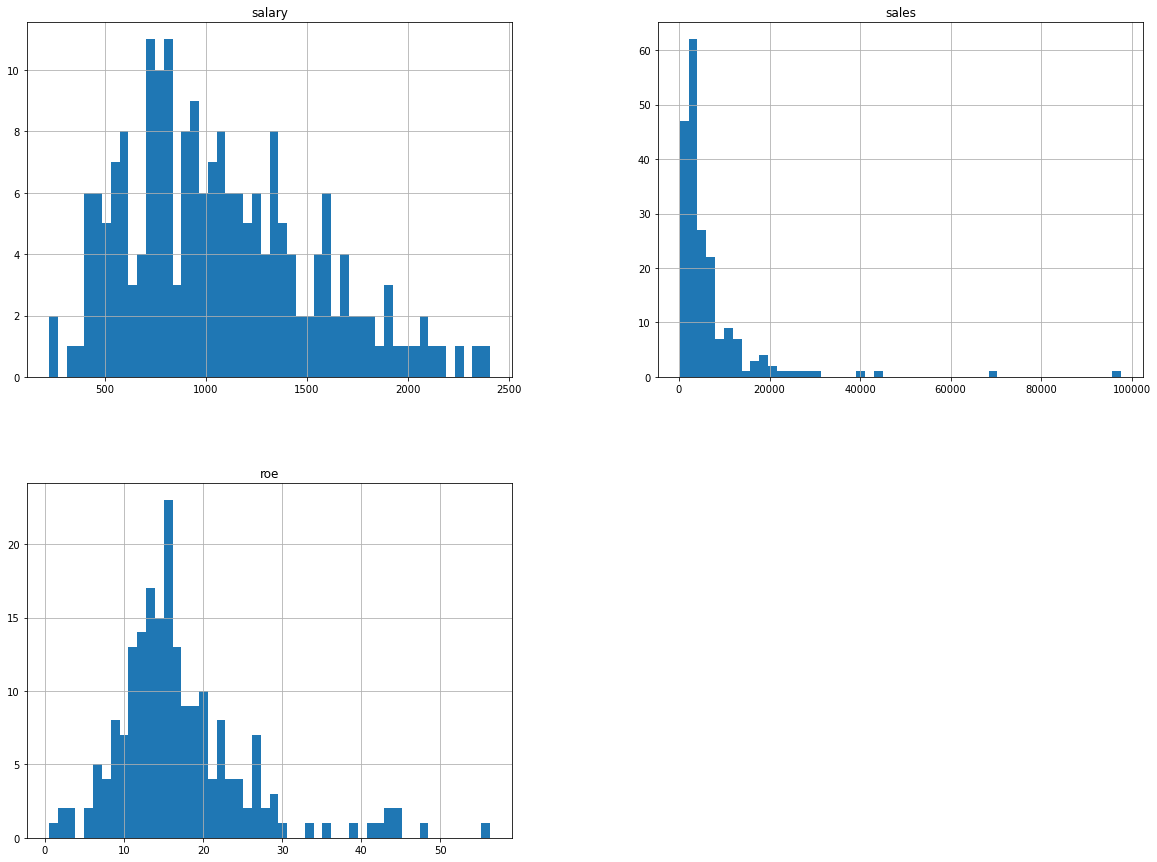

In [23]:
data_IQR.hist(bins=50, figsize=(20,15))


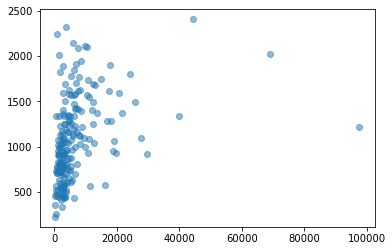

In [24]:
import matplotlib.pyplot as plt
plt.scatter(data_IQR['sales'], data_IQR['salary'], alpha=0.5)
plt.show()

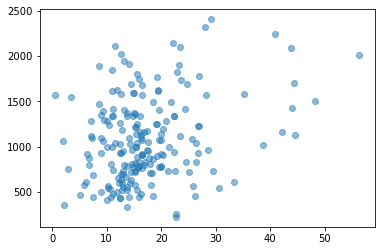

In [25]:
plt.scatter(data_IQR['roe'], data_IQR['salary'], alpha=0.5)
plt.show()

In [26]:
Q1_sales = data['sales'].quantile(q=0.25)
Q3_sales = data['sales'].quantile(q=0.75)
IQR_sales = Q3_sales-Q1_sales
IQR_sales

4966.6999511718695

In [27]:
data_IQR=data[(data['sales']<Q3_sales+IQR_sales*1.5)& (data['sales']>Q1_sales-IQR_sales*1.5) &
              (data['salary']<Q3_salary+IQR_salary*1.5)& (data['salary']>Q1_salary-IQR_salary*1.5)]

In [28]:
# 4. 변수 변환
# 4-1. log 변환

import numpy as np
data['log_salary'] = np.log(data['salary'])
data['log_sales'] = np.log(data['sales'])
data['log_roe'] = np.log(data['roe'])

In [29]:
data.head

<bound method NDFrame.head of      salary         sales   roe industry  log_salary  log_sales   log_roe
0      1095  27595.000000  14.1  Service    6.998510  10.225390  2.646175
1      1001   9958.000000  10.9  Service    6.908755   9.206132  2.388763
2      1122   6125.899902  23.5  Service    7.022868   8.720281  3.157000
3       578  16246.000000   5.9  Service    6.359574   9.695602  1.774952
4      1368  21783.199219  13.8  Service    7.221105   9.988894  2.624669
..      ...           ...   ...      ...         ...        ...       ...
204     930   1509.099976   9.0   Others    6.835185   7.319269  2.197225
205     525   1097.099976  15.5   Others    6.263398   7.000426  2.740840
206     658   4542.600098  12.1   Others    6.489205   8.421255  2.493205
207     555   2023.000000  13.7   Others    6.318968   7.612337  2.617396
208     626   1442.500000  14.4   Others    6.439350   7.274133  2.667228

[209 rows x 7 columns]>

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>,
        <AxesSubplot:title={'center':'log_salary'}>],
       [<AxesSubplot:title={'center':'log_sales'}>,
        <AxesSubplot:title={'center':'log_roe'}>]], dtype=object)

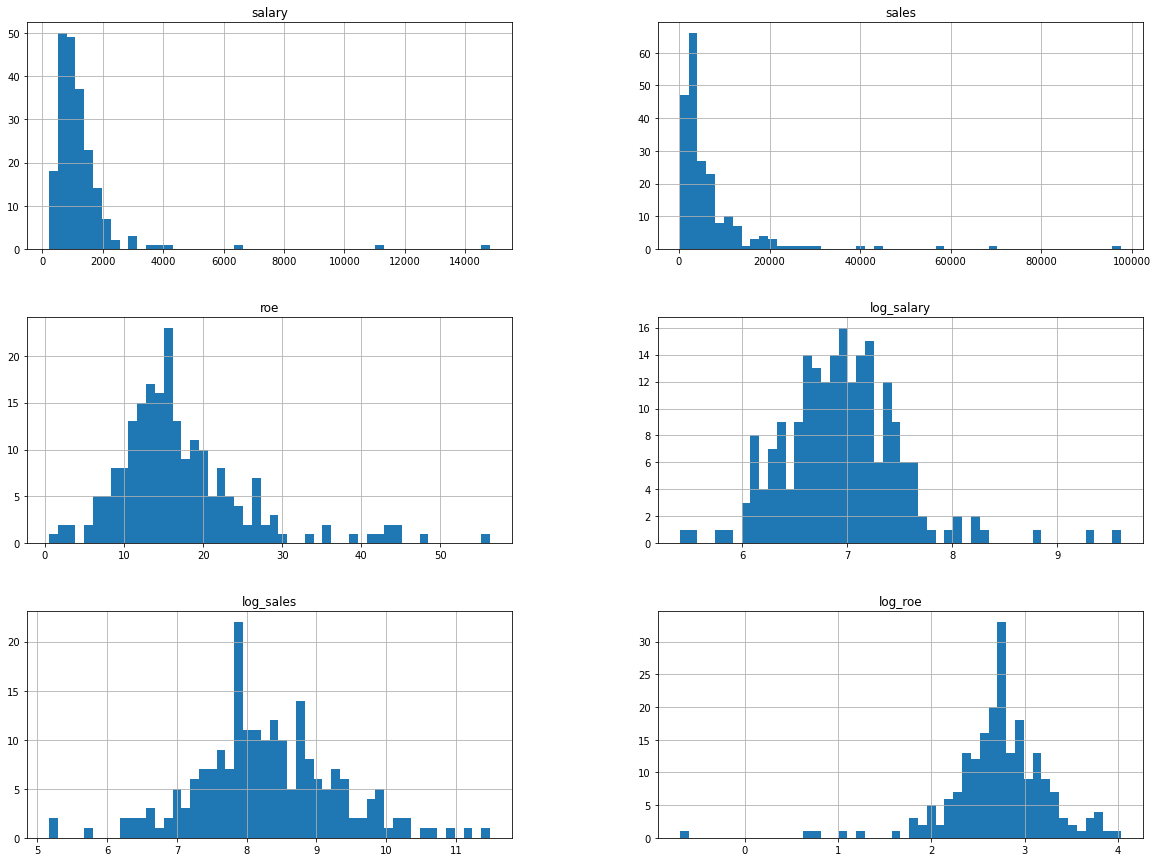

In [31]:
data.hist(bins=50, figsize=(20,15))

In [32]:
data.corr()

,salary,sales,roe,log_salary,log_sales,log_roe
salary,1.000000,0.119869,0.114842,0.794208,0.194092,0.101526
sales,0.119869,1.000000,-0.055386,0.281286,0.742921,-0.041004
roe,0.114842,-0.055386,1.000000,0.208499,-0.122553,0.873419
log_salary,0.794208,0.281286,0.208499,1.000000,0.459148,0.163548
log_sales,0.194092,0.742921,-0.122553,0.459148,1.000000,-0.120642
log_roe,0.101526,-0.041004,0.873419,0.163548,-0.120642,1.000000


In [33]:
data['sqrt_salary']= np.sqrt(data['salary'])
data['sqrt_sales']=np.sqrt(data['sales'])
data['sqrt_roe']=np.sqrt(data['roe'])

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'roe'}>],
       [<AxesSubplot:title={'center':'log_salary'}>,
        <AxesSubplot:title={'center':'log_sales'}>,
        <AxesSubplot:title={'center':'log_roe'}>],
       [<AxesSubplot:title={'center':'sqrt_salary'}>,
        <AxesSubplot:title={'center':'sqrt_sales'}>,
        <AxesSubplot:title={'center':'sqrt_roe'}>]], dtype=object)

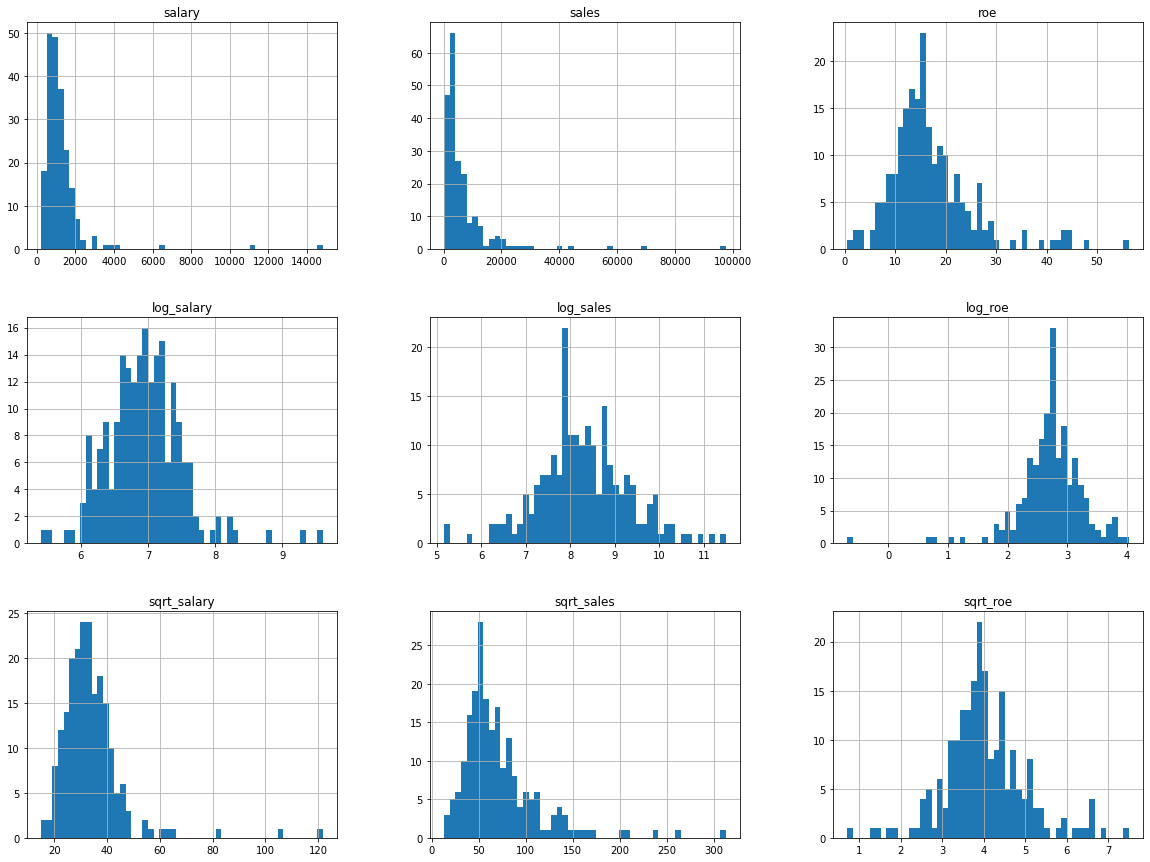

In [34]:
data.hist(bins=50, figsize=(20,15))


In [35]:
# 5. 결측치 처리
import pandas as pd
data = pd.read_csv('D:/user/User/pydata/Ex_Missing.csv')

In [36]:
data

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,NaN,9958.000000,10.900000,1
2,NaN,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,NaN,13.800000,1
5,1145.0,NaN,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


In [40]:
# 5-1. 결측치 확인
# 가. 전체 및 변수별 결측 확인
# isnull(): 결측이면 True 아니면 False
pd.isnull(data)
data.isnull()

,salary,sales,roe,industry
0,False,False,False,False
1,True,False,False,False
2,True,False,False,False
3,False,False,False,False
4,False,True,False,False
5,False,True,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,True,False


In [41]:
# notnull(): 결측이면 False 아니면 True
pd.notnull(data)
data.notnull()

,salary,sales,roe,industry
0,True,True,True,True
1,False,True,True,True
2,False,True,True,True
3,True,True,True,True
4,True,False,True,True
5,True,False,True,True
6,True,True,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,False,True


In [42]:
# 변수(컬럼)별로 결측값 개수 확인: df.isnull().sum()
data.isnull().sum()

salary      2
sales       2
roe         1
industry    0
dtype: int64

In [43]:
# 특정 변수(컬럼)의 결측값 개수 확인: df.isnull().sum()
data['salary'].isnull().sum()

2

In [44]:
# 변수(컬럼)별로 결측 아닌 값의 개수 확인: df.notnull().sum()
data.notnull().sum()


salary       8
sales        8
roe          9
industry    10
dtype: int64

In [45]:
# 나. 행별 결측 확인 및 저장
data.isnull().sum(1)


0    0
1    1
2    1
3    0
4    1
5    1
6    0
7    0
8    0
9    1
dtype: int64

In [46]:
# 행(row) 단위로 결측값 개수 구해서 새변수 생성하기
data['missing'] = data.isnull().sum(1)

In [48]:
# 가. 결측값 있는 행(row/case) 제거
data_del_row = data.dropna(axis=0)
data_del_row

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
3,578.0,16246.000000,5.900000,1,0
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0


In [49]:
# 나. 결측값 있는 열(column/variable) 제거
data_del_col = data.dropna(axis=1)
data_del_col

,industry,missing
0,1,0
1,1,1
2,1,1
3,1,0
4,1,1
5,2,1
6,2,0
7,2,0
8,2,0
9,2,1


In [52]:
# 특정값으로 대체: df.fillna(value/string)
data_0 = data.fillna(0)
data_0

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
1,0.0,9958.000000,10.900000,1,1
2,0.0,6125.899902,23.500000,1,1
3,578.0,16246.000000,5.900000,1,0
4,1368.0,0.000000,13.800000,1,1
5,1145.0,0.000000,20.000000,2,1
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0
9,833.0,2830.000000,0.000000,2,1


In [53]:
# 결측값을 'missing' 문자로 대체
data_m = data.fillna('Missing')
data_m

,salary,sales,roe,industry,missing
0,1095.0,27595.0,14.1,1,0
1,Missing,9958.0,10.9,1,1
2,Missing,6125.899902,23.5,1,1
3,578.0,16246.0,5.9,1,0
4,1368.0,Missing,13.8,1,1
5,1145.0,Missing,20.0,2,1
6,1078.0,2266.699951,16.4,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.5,2,0
9,833.0,2830.0,Missing,2,1


In [54]:
# 결측값을 앞 방향으로 채우기: df.fillna(method='ffill' or 'pad')
data_ffill=data.fillna(method='ffill')
data_ffill

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
1,1095.0,9958.000000,10.900000,1,1
2,1095.0,6125.899902,23.500000,1,1
3,578.0,16246.000000,5.900000,1,0
4,1368.0,16246.000000,13.800000,1,1
5,1145.0,16246.000000,20.000000,2,1
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0
9,833.0,2830.000000,10.500000,2,1


In [55]:
# 결측값을 앞 방향으로 채우기: df.fillna(method='ffill' or 'pad')
data_pad=data.fillna(method='pad')
data_pad

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
1,1095.0,9958.000000,10.900000,1,1
2,1095.0,6125.899902,23.500000,1,1
3,578.0,16246.000000,5.900000,1,0
4,1368.0,16246.000000,13.800000,1,1
5,1145.0,16246.000000,20.000000,2,1
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0
9,833.0,2830.000000,10.500000,2,1


In [56]:
# 결측값을 뒷 방향으로 채우기: df.fillna(method='bfill' or 'backfill')
data_bfill=data.fillna(method='bfill')
data_bfill

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
1,578.0,9958.000000,10.900000,1,1
2,578.0,6125.899902,23.500000,1,1
3,578.0,16246.000000,5.900000,1,0
4,1368.0,2266.699951,13.800000,1,1
5,1145.0,2266.699951,20.000000,2,1
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0
9,833.0,2830.000000,NaN,2,1


In [57]:
# 평균으로 대체
data_mean=data.fillna(data.mean())
data_mean

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
1,1053.5,9958.000000,10.900000,1,1
2,1053.5,6125.899902,23.500000,1,1
3,578.0,16246.000000,5.900000,1,0
4,1368.0,9069.825012,13.800000,1,1
5,1145.0,9069.825012,20.000000,2,1
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0
9,833.0,2830.000000,14.600000,2,1


In [58]:
# 중위수로 대체
data_median=data.fillna(data.median())
data_median

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
1,1094.5,9958.000000,10.900000,1,1
2,1094.5,6125.899902,23.500000,1,1
3,578.0,16246.000000,5.900000,1,0
4,1368.0,5348.050049,13.800000,1,1
5,1145.0,5348.050049,20.000000,2,1
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0
9,833.0,2830.000000,14.100000,2,1


In [59]:
# 최대/최소로 대체
data_max=data.fillna(data.max())
data_max

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
1,1368.0,9958.000000,10.900000,1,1
2,1368.0,6125.899902,23.500000,1,1
3,578.0,16246.000000,5.900000,1,0
4,1368.0,27595.000000,13.800000,1,1
5,1145.0,27595.000000,20.000000,2,1
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0
9,833.0,2830.000000,23.500000,2,1


In [60]:
# 다른 변수 평균으로 대체
# salary 변수의 평균값으로 모든 결측값 대체
data_other_mean=data.fillna(data['salary'].mean())
data_other_mean

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
1,1053.5,9958.000000,10.900000,1,1
2,1053.5,6125.899902,23.500000,1,1
3,578.0,16246.000000,5.900000,1,0
4,1368.0,1053.500000,13.800000,1,1
5,1145.0,1053.500000,20.000000,2,1
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0
9,833.0,2830.000000,1053.500000,2,1


In [61]:
# 다른 변수 값으로 대체
# sales의 결측값을 salary 값으로 대체
import numpy as np
data2=data.copy()
data2['sales_new'] = np.where(pd.notnull(data2['sales']) == True, data2['sales'], data2['salary'])
data2

,salary,sales,roe,industry,missing,sales_new
0,1095.0,27595.000000,14.100000,1,0,27595.000000
1,NaN,9958.000000,10.900000,1,1,9958.000000
2,NaN,6125.899902,23.500000,1,1,6125.899902
3,578.0,16246.000000,5.900000,1,0,16246.000000
4,1368.0,NaN,13.800000,1,1,1368.000000
5,1145.0,NaN,20.000000,2,1,1145.000000
6,1078.0,2266.699951,16.400000,2,0,2266.699951
7,1094.0,2966.800049,16.299999,2,0,2966.800049
8,1237.0,4570.200195,10.500000,2,0,4570.200195
9,833.0,2830.000000,NaN,2,1,2830.000000


In [62]:
# lamda 함수의 apply() 적용
fill_mean_func = lambda g: g.fillna(g.mean())

data_group_mean=data.groupby('industry').apply(fill_mean_func)
data_group_mean

salary         sales        roe  industry  missing
industry                                                           
1        0  1095.000000  27595.000000  14.100000         1        0
         1  1013.666667   9958.000000  10.900000         1        1
         2  1013.666667   6125.899902  23.500000         1        1
         3   578.000000  16246.000000   5.900000         1        0
         4  1368.000000  14981.224975  13.800000         1        1
2        5  1145.000000   3158.425049  20.000000         2        1
         6  1078.000000   2266.699951  16.400000         2        0
         7  1094.000000   2966.800049  16.299999         2        0
         8  1237.000000   4570.200195  10.500000         2        0
         9   833.000000   2830.000000  15.800000         2        1